各メソッドやプロパティの解説はURL参照  
https://qiita.com/nanairoGlasses/items/084b7656c285b4a41e03  

In [1]:
import numpy as np
import cv2

from sklearn import metrics
from sklearn import model_selection
from sklearn import linear_model

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
import pandas as pd

In [3]:
mobile = pd.read_csv('./Mobile.csv', index_col=0)
census = pd.read_csv('./Census.csv', index_col=0)
vehicles = pd.read_csv('./Vehicles.csv', index_col=0)
pedestrians = pd.read_csv('./Pedestrians.csv', index_col=0)

cp = pd.read_csv('./Census_Pickup.csv', index_col=0)
vp = pd.read_csv('./Vehicles_Pickup.csv', index_col=0)

In [4]:
linreg = linear_model.LinearRegression()

In [5]:
num = '720'

In [6]:
X = vp[num]
Y = cp[num]
X = X.values.reshape(-1, 1)
Y = Y.values.reshape(-1, 1)

In [7]:
linreg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
linreg.coef_.mean()

0.42727821363910667

In [9]:
linreg.intercept_.mean()

0.035123717561858836

In [10]:
culced = X * linreg.coef_.mean() + linreg.intercept_.mean()
culced

array([[ 1.18877489],
       [ 3.1969825 ],
       [ 2.21424261]])

In [11]:
Y

array([[ 1. ],
       [ 3. ],
       [ 2.6]])

In [12]:
r2 = (culced - Y) ** 2
r2

array([[ 0.03563596],
       [ 0.0388021 ],
       [ 0.14880877]])

In [13]:
pred = linreg.predict(X)
pred

array([[ 1.18877489],
       [ 3.1969825 ],
       [ 2.21424261]])

In [14]:
linreg.score(X, Y)

0.90033623588240341

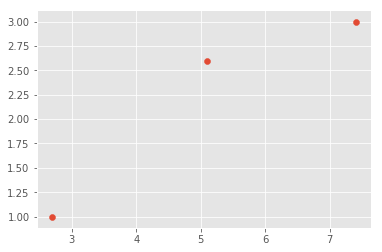

In [15]:
plt.scatter(X, Y)

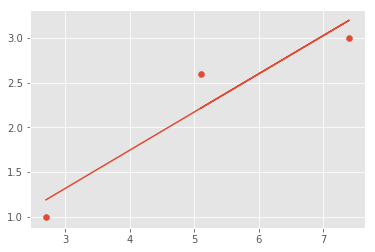

In [16]:
plt.scatter(X, Y)
plt.plot(X, linreg.predict(X))

In [17]:
metrics.mean_squared_error(Y, linreg.predict(X))

0.074415610541138752

In [18]:
metrics.mean_squared_error(Y, pred)

0.074415610541138752